# **Trabajo Final de Curso: Python - Data Science**

Nombre: Michael Enrique Carreño Ramon

## **Información de Dataset elegido**

El dataset **"Netflix Movies and TV Shows"** proporciona información de la plataforma de streaming Netflix. Incluye tanto Películas como Shows de TV con carácteristicas principales que serán utilizados para prácticas de análisis por su estructura.

Disponible en el siguiente link: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

## **Detalles de Dataset**

**show_id:** Identificador único

**type:** Tipo de contenido: Movie o TV Show

**title:** Nombre del contenido

**director:** Nombre del director o directora

**cast:** Lista de actores y actrices principales

**country:** País(es) de origen

**date_added:** Año en el que se agregó a la plataforma de Netflix

**release_year:** Año en que se realizó la producción del contenido

**rating:** Clasificación por edad (TV-MA, PG, R, etc)

**duration:** Duración de película (min) o cantidad de temporadas en serie

**listed_in:** Categoría o género del contenido

**description:** Sipnosis del contenido

## **Objetivo del análisis**

Este proyecto es para realizar un análisis exploratorio de todo el dataset con el fin de:



*   Preparar los datos mediante técnicas de limpieza y tratamiento de valores nulos.
*   Mejorar la calidad del dataset mediante la detección y eliminación de valores duplicados.
*   Generar visualizaciones usando herramientas como Matplotlib, Seaborn o Plotly, con etiquetas, leyendas y descripciones interpretativas que respalden los hallazgos.

# **1. Cargar el Dataset**

## Importar librerías

In [1]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Detalle de librerias**

- Pandas: Librería diseñada para la manipulación y análisis de datos estructurados, como tablas tipo hoja de cálculo o bases de datos, así como series temporales.

- NumPy (Numerical Python): Biblioteca fundamental para cálculos numéricos, que proporciona soporte para arreglos y matrices grandes y multidimensionales, junto con funciones matemáticas de alto rendimiento.

- Matplotlib: Librería de visualización en Python que permite crear gráficos estáticos, interactivos y animados de forma flexible.

- Seaborn: Extensión de Matplotlib enfocada en visualización estadística. Ofrece gráficos más estilizados y facilita el análisis exploratorio de datos.

## Opción 1: Desde Google Drive (requiere conexión a internet)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Phawai + Tarecda/netflix_titles.csv')

Nota: Este método debe ejecutarse únicamente si el archivo se encuentra previamente alojado en tu Google Drive.

## Opción 2: Desde el ordenador local (modo manual)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (2).csv


In [3]:
df = pd.read_csv('netflix_titles.csv')

Nota: Este método es útil si no deseas utilizar Google Drive o si el entorno de ejecución no requiere conexión a internet previa. Aplica en casos donde el archivo se carga directamente desde tu dispositivo.

## **Conclusión**
En esta etapa hemos explorado dos métodos para cargar el dataset "Netflix Movies and TV Shows".

Por un lado, la carga desde Google Drive, ideal para entornos colaborativos como Google Colab, requiere conexión a internet activa y acceso al archivo previamente alojado en la nube.

Por otro lado, la carga local desde el ordenador permite trabajar sin conexión, ya sea en notebooks locales o entornos offline como Visual Studio Code. Esta alternativa resulta útil cuando no se dispone de conectividad o se busca ejecutar el análisis de forma autónoma.

# **2. Carga y procesamiento de datos**

El procesamiento de datos es la conversión de datos sin procesar en información utilizable  a través de pasos estructurados como la recopilación, la preparación, el análisis y el almacenamiento de datos. Las organizaciones pueden obtener conocimiento práctico y fundamentar la toma de decisiones procesando los datos con eficacia.

## 2.1. Exploración de Dataframe

In [4]:
# Visualizar las primeras filas del dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Nota: El .head() se lo utiliza para tener una vista rápida de los primeros datos, por lo general las primeras 5 filas

In [5]:
# Visualizar las últimas filas del dataset

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Nota: Muestra los registros finales del DataFrame

In [6]:
# Visualizar la información del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Nota: Resume la estructura del DataFrame es ideal para chequear tipos de datos y nulos

In [7]:
# Detectar valores atípicos o rangos inesperados

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Nota: Muestra las estadísticas descriptivas de columnas numéricas, se la utiliza principalmente para análizar de forma rápida la distribución y rango

In [8]:
df.shape

(8807, 12)

Esta linea devuelve el tamaño del DataFrame como una tupla (filas, columnas)

**Nota Importante** antes de la evaluación

El dataset indica que se importaron correctamente:

**8807 filas** → cantidad de registros en el dataset

**12 columnas** → cantidad de variables o características que existen por registro

## 2.2. Evaluación Inicial del Dataset

In [9]:
# Identificar variables numéricas y categóricas

numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=[object]).columns.tolist()

# Mostrar las variables numéricas

print("Lista de Variables Numéricas:")
for v in numericas:
    print("  -", v)

# Mostrar las variables categóricas

print("Lista de Variables Categóricas:")
for v in categoricas:
    print("  -", v)

Lista de Variables Numéricas:
  - release_year
Lista de Variables Categóricas:
  - show_id
  - type
  - title
  - director
  - cast
  - country
  - date_added
  - rating
  - duration
  - listed_in
  - description


Lo primero que realicé fue separar las columnas del DataFrame en dos tipos: numéricas (como int, float) y categóricas (como str o object) para poder identificar con que valores numéricos y que valores de texto cuento dentro de mi DataFrame.

Me sirve para determinar qué tipo de análisis aplicar

**Variables numéricas** → puedo aplicar estadística descriptiva, histograma, correlaciones.

**Variables categóricas** → puedo realizar conteo de frecuencias, gráficos de barras, agrupaciones.

Por lo que puedo notar e interpretar que solo cuento con un valor numérico (release_year) lo que indica que la mayoría de las columnas son de tipo categórico (texto).

In [10]:
# Verificar en todo el dataset las filas duplicadas

filas_duplicadas = df.duplicated().sum()
print(f'Filas duplicadas: {filas_duplicadas}')

Filas duplicadas: 0


Luego realicé un conteo de cuántas filas exactas se repiten en el dataset.
Como podemos visualizar no cuento con ninguna fila duplicada lo que es una buena señal ya que no hay registros idénticos que distorsionen la distribución.

In [11]:
# Verificar si existen valores faltantes en el dataset

valores_faltantes = df.isnull().sum()

# Mostrar los valores faltantes por columna

print(f'Valores faltantes por columna:\n{valores_faltantes}')

Valores faltantes por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Realicé una verificación de valores faltantes y podemos determinar que:

*   director tiene 2,634 valores faltantes lo cual es una cifra significativa.
*   cast y country tambien tiene valores faltantes, menos que director, pero sigue siendo una cifra que debemos interpretar de que forma solucionar la falta de valores dependiendo de como queramos continuar con nuestro análisis.
*   date_added tambien tiene 10 valores faltantes, casi nada a comparación de los otros dos casos.
*   rating y duration tambien tiene 4 y 3 valores faltantes respectivamente, los que menos valores faltante tienes hasta el análisis de este dataset.



## **Conclusión**
Realizamos una inspección general del dataset para validar su estructura y variables antes de iniciar con la limpieza de datos para mejorar la calidad del mismo.
Identificamos que:



*   El dataset contiene 8807 registros y 12 columnas
*   La mayoría de las variables son categóricas, con release_year como la única numérica.
*   No existen filas duplicadas
*   Existen valores faltantes en diferentes columnas, unas con mayor impacto sobre el dataset sobre otras, lo que nos plantea a tomar decisiones de como manejar esos valores faltantes

Esta evaluación general nos permite tener un mejor enfoque con que dataset estamos trabajando y avanzar con claridad para la etapas de limpieza, transformación, normalización y visualización con una base sólida.



# **3. Limpieza de Datos**

La limpieza de datos, también llamada depuración de datos, es el proceso de identificar, corregir y eliminar errores, inconsistencias e información irrelevante de un conjunto de datos para mejorar su calidad y precisión.

## 3.1. Eliminación de Columnas

In [12]:
# Eliminar columnas con mayor cantidad de valores núlos

df.drop(['director', 'cast', 'country'], axis=1, inplace=True)

In [13]:
print(df.columns)

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')


Decisión Técnica: Se eliminaron las columnas director, cast, country debido a sus grandes cantidades de valores nulos. La alternativa de eliminar filas no es recomendable por la significativa pérdida de datos lo cual no sería eficiente para realizar un análsis.

**Motivos de eliminación de columnas:**

*   Reduce ruido en el análisis
*   Mejora rendimiento en operaciones y visualizaciones
*   Simplifica la estructura del dataframe

Resultado: El dataframe ahora contiene 9 columnas





In [14]:
# Volvemos a verificar el los valores nulos

df.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,10
release_year,0
rating,4
duration,3
listed_in,0
description,0


## 3.2. Eliminación de Filas

In [15]:
# Eliminar filas con valores nulos

df.dropna(inplace=True)

In [16]:
# Verificamos el número de filas luego de la eliminación

len(df)

8790

In [17]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0


Nota: Acabé de realizar la eliminación de la columnas con valores nulos por lo cual podemos ver que ya no existen valores vacíos dentro de nuestro dataset

In [18]:
# Verificamos la nueva dimensión de nuestro dataset

df.shape

(8790, 9)

Nota: Podemos ver que nuestro dataset ahora tiene 8790 filas y 9 columnas luego de limpiar valores nulos

In [19]:
# Volvemos a visualizar como se ve nuestro dataset

df.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Nota: Podemos observar que ya no existen valores nulos.

Paso opcional: Descargar la nueva data procesada

In [20]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV

df.to_csv('netflix_titles_preprocessed.csv', index=False)

# Descargar el archivo CSV

files.download('netflix_titles_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.3. Normalización de datos

La normalización de datos es un proceso para organizar los datos en una base de datos de manera que se reduzca la redundancia y se mejore la integridad.

### 3.3.1. Columna duration

In [20]:
# Extrae solo el número

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Extrae solo el tipo de duración sin crear columnas adicionales

df['duration_type'] = df['duration'].apply(lambda x: 'min' if isinstance(x, str) and 'min' in x.lower() else 'season')

# Eliminación de columna original

df.drop(['duration'], axis=1, inplace=True)

In [21]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'listed_in', 'description', 'duration_num', 'duration_type']


In [22]:
df.head()

,show_id,type,title,date_added,release_year,rating,listed_in,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season


Decisión Técnica: Se descompuso la variable mixta duration, originalmente en formato string, en dos componentes explícitos:

* duration_num: valor numérico de duración extraído mediante expresión regular.

* duration_type: unidad de medida derivada del contenido textual (min o season).

**Motivos de Normalización**

* Facilitar el tratamiento por separado en modelos predictivos o filtrado por unidad.

* Establecer una estructura uniforme que evita ambigüedades y mejora la legibilidad en el pipeline.



### 3.3.2. Columna rating

In [23]:
# Verificamos cuantos datos existen en la columna rating

print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


Nota: Este paso es crucial para verificar cuantos datos existen en la columan rating ya que si no colocamos todos podemos generar valores nulos

In [24]:
# Definir el diccionario de mapeo

rating_map = {
    'PG-13': 0, 'TV-MA': 1, 'PG': 2, 'TV-14': 3,
    'TV-PG': 4, 'TV-Y': 5, 'TV-Y7': 6, 'R': 7,
    'TV-G': 8, 'G': 9, 'NC-17': 10, 'NR': 11,
    'TV-Y7-FV': 12, 'UR': 13
}

# Aplicar el mapeo

df['rating_encoded'] = df['rating'].map(rating_map)

# Eliminar la columna original

df.drop(['rating'], axis=1, inplace=True)


Nota: Convierto la cadena de texto en variables numéricas

* 'PG-13': 0
* 'TV-MA': 1
* 'PG': 2
* 'TV-14': 3
* 'TV-PG': 4
* 'TV-Y': 5
* 'TV-Y7': 6
* 'R': 7
* 'TV-G': 8
* 'G': 9
* 'NC-17': 10
* 'NR': 11
* 'TV-Y7-FV': 12
* 'UR': 13

In [25]:
print(df.columns)

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'listed_in',
       'description', 'duration_num', 'duration_type', 'rating_encoded'],
      dtype='object')


In [26]:
df.tail()

,show_id,type,title,date_added,release_year,listed_in,description,duration_num,duration_type,rating_encoded
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min,7
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,season,6
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min,7
8805,s8806,Movie,Zoom,"January 11, 2020",2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min,2
8806,s8807,Movie,Zubaan,"March 2, 2019",2015,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111.0,min,3


Decisión Técnica: Se verificó previamente la variedad de categorías presentes esto permitió construir un diccionario de codificación completo, evitando la generación de valores nulos durante la transformación. Una vez codificados los datos, se eliminó la columna original para mantener un esquema limpio y evitar redundancias.

**Motivos de Normalización**

* Visualizaciones más precisas al tener valores para visualizarlos de forma cualitativas.
* Análisis categórico ordenado.

### 3.3.3. Columna listen_in

In [27]:
# Creamos columnas a raíz de las cadenas de textos existentes en la columna 'listen_in'

df_genres = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, df_genres], axis=1)

In [28]:
df.head()

,show_id,type,title,date_added,release_year,listed_in,description,duration_num,duration_type,rating_encoded,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season,1,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,"September 24, 2021",2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season,1,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season,1,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season,1,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Verificamos la creación de las columnas nuevas a partir de listen_in

print(df.columns)

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'listed_in',
       'description', 'duration_num', 'duration_type', 'rating_encoded',
       'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'T

In [30]:
# Verificamos que luego de la normalización no existan valores nulos

df.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,0
release_year,0
listed_in,0
description,0
duration_num,0
duration_type,0
rating_encoded,0


Decisión técnica: La estructura previa no es directamente recomendable para analizarla de manera cuantitativo ni para segmentación por categoría. Por ello, se aplicó una técnica de normalización basada en codificación binaria con get_dummies(), que permite convertir los géneros en columnas individuales con valores booleanos (1 si el género está presente en el registro, 0 si no).

**Motivos para la normalización**

* Cada género se representa como variable propia, evitando ambigüedad.
* Nos va a permitir filtrar, agrupar o visualizar títulos por género específico.

Paso opcional: Descargar la nueva data procesada

In [31]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV

df.to_csv('netflix_titles_preprocessed.csv', index=False)

# Descargar el archivo CSV

files.download('netflix_titles_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conlusión**

Durante esta fase se implementaron transformaciones clave sobre variables mixtas y categóricas del dataset, priorizando la estructuración, trazabilidad y compatibilidad analítica del contenido.

Aplicamos la siguietes:
* Transformación de la columna duration
* Codificación de la variable rating
* Normalización de la columna listed_in

Estas transformaciones aseguran una visualización clara y precisa del dataset, habilitando el descubrimiento de patrones y tendencias de forma accesible para usuarios técnicos y no técnicos. Se fortaleció además la preparación del DataFrame para futuras etapas como análisis exploratorio, modelado o segmentación.

# **4. Visualización**

La visualización de datos es la representación gráfica de información y datos. Al utilizar elementos visuales como cuadros, gráficos y mapas, las herramientas de visualización de datos proporcionan una manera accesible de ver y comprender tendencias, valores atípicos y patrones en los datos.

## 4.1. Heatmap

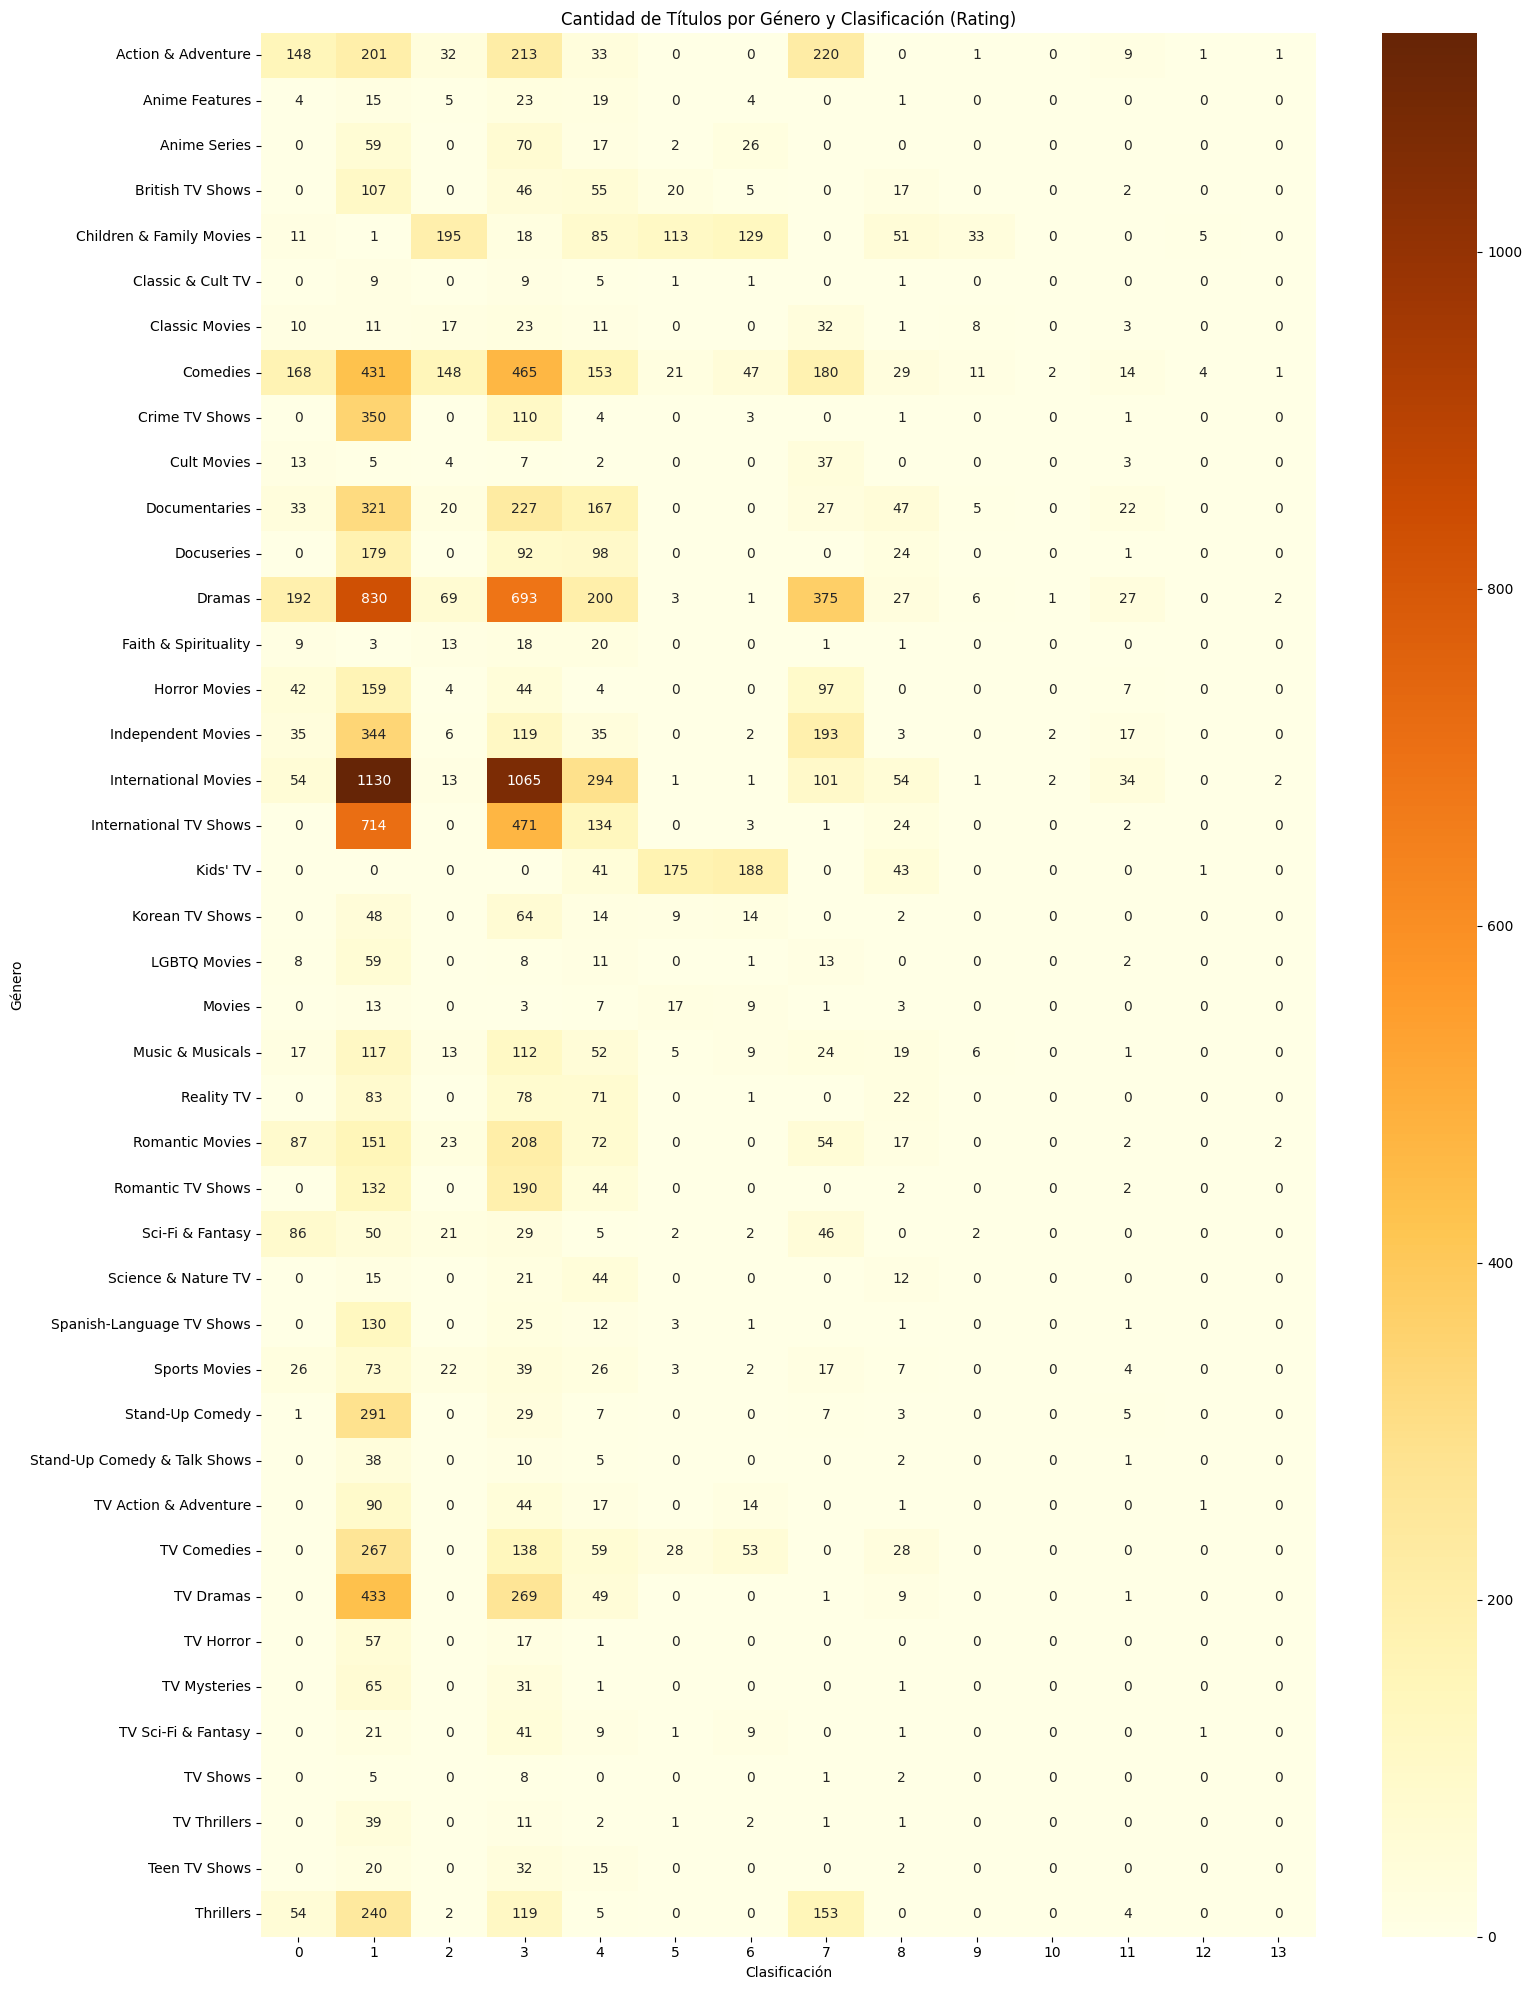

In [31]:
# Seleccionar columnas binarias de géneros (a partir del índice 10 como antes)
generos_binarios = df.columns[10:]

# Lista para construir el nuevo DataFrame
heatmap_lista = []

# Recorrer cada fila del DataFrame original
for _, fila in df.iterrows():
    for genero in generos_binarios:
        if fila[genero] == 1:  # Si ese título pertenece a ese género
            heatmap_lista.append({
                'Género': genero,
                'Rating': fila['rating_encoded']  # O usa 'rating' si prefieres el original
            })

# Crear DataFrame para el heatmap
heatmap_df = pd.DataFrame(heatmap_lista)

# Agrupar y contar
heatmap_data = heatmap_df.groupby(['Género', 'Rating']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(16, 20))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Cantidad de Títulos por Género y Clasificación (Rating)')
plt.xlabel('Clasificación')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

**Interpretación**

El eje y (vertical) está compuesto por los Géneros que tenemos en nuestro dataset

El eje x (horizontal) contiene los valores de las clasificaciones de contenido

Cada celda representa el número de títulos que pertenecen a un género específico y poseen una clasificación determinada.

La intensidad de color ( en este caso utilizamos un mapa magma) muestra la frecuencia: colores más claros indican mayor presencia; colores oscuros, menor frecuencia o ausencia.

**Decisión técnica**

Utilicé un heatmap porque permite visualizar simultáneamente 40+ géneros y 14 clasificaciones sin perder claridad. Cosa que no sería muy bien visto en un diagrama de barras, o un gráfico de pastel.

**Conclusiones**

* Se observa que géneros como “Comedies”, “Romantic TV Shows” y “TV Dramas” se distribuyen en clasificaciones medias (PG, TV-PG, TV-14), reflejando una intención editorial de alcanzar públicos amplios.

* Por otro lado, géneros como “Documentaries” y “Crime TV Shows” presentan una mayor concentración en clasificaciones TV-MA o R, indicando temáticas más adultas o complejas.

* Géneros infantiles como “Kids’ TV” se agrupan fuertemente en TV-Y y TV-Y7, lo que valida la normalización y codificación aplicada previamente. Este patrón de distribución por clasificación permite segmentar claramente el contenido por rango de edad.

## 4.2. Gráfico de Burbujas

Columnas en bubble_df: Index(['Genero', 'Duracion_Promedio', 'Cantidad'], dtype='object')
                     Genero  Duracion_Promedio  Cantidad
0        Action & Adventure         113.515716       859
1            Anime Features          92.943662        71
2              Anime Series           1.574713       174
3          British TV Shows           1.817460       252
4  Children & Family Movies          79.936037       641


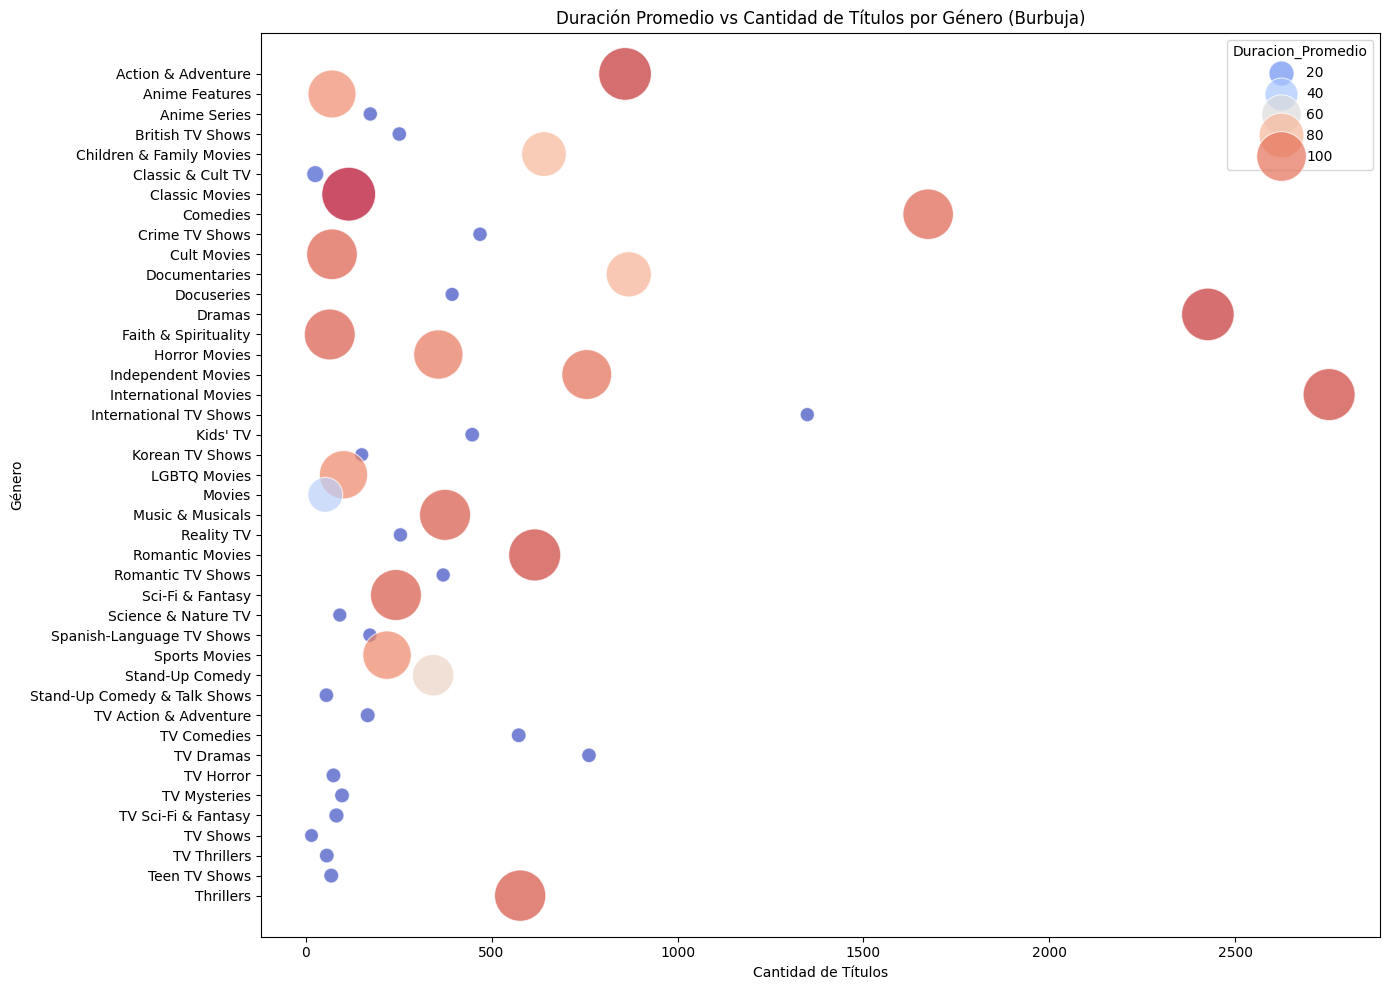

In [32]:
# Seleccionar columnas binarias de género
generos_binarios = df.columns[10:]  # A partir de la columna 10 en adelante

# Verificación: existen columnas de duración
if 'duration_num' not in df.columns:
    raise ValueError("La columna 'duration_num' no existe en el dataset.")

# Crear lista para agrupar info
bubble_data = []

for genero in generos_binarios:
    if genero in df.columns:
        subset = df[df[genero] == 1]
        if not subset.empty:
            promedio_duracion = subset['duration_num'].mean()
            conteo = subset.shape[0]
            bubble_data.append({
                'Genero': genero,
                'Duracion_Promedio': promedio_duracion,
                'Cantidad': conteo
            })

# Convertir a DataFrame
bubble_df = pd.DataFrame(bubble_data)

# Verifica que las columnas existan correctamente
print("Columnas en bubble_df:", bubble_df.columns)
print(bubble_df.head())

# Graficar
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=bubble_df,
    x='Cantidad',
    y='Genero',
    size='Duracion_Promedio',
    hue='Duracion_Promedio',
    sizes=(100, 1500),
    palette='coolwarm',
    alpha=0.7,
    legend='brief'
)
plt.title('Duración Promedio vs Cantidad de Títulos por Género (Burbuja)')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

**Interpretación**

El eje y (vertical) es el número de los títulos por género

El eje x (horizontal) contiene los géneros normalizado (columna binaria con presencia)

El tamaño de la burbuja muestra la duración promedio en minutos (Duracion_Promedio)

Cada burbuja representa una categoría de género con su volumen en el catálogo y su tendencia de duración, y el color de la burbuja también representa duración promedio, permitiendo doble codificación visual

**Decisión técnica**

Se utilizó el gráfico de burbuja por su visión multidimensional condensada lo que muestran 3 variables a la vez sin saturar la lectura. Permite una visualización clara y entender cómo la duración se relaciona con el volumen por género.

**Conclusiones**

* Géneros con burbujas grandes y claras (como “Documentaries” o “Cult Movies”) tienden a tener títulos más extensos.

* Géneros con muchas obras pero burbuja pequeña y oscura (como “Reality TV” o “Teen TV Shows”) indican una gran cantidad de títulos, pero con duración corta.

* Es fácil detectar géneros con alta producción pero baja duración promedio, lo que puede sugerir formatos episódicos, dirigidos a consumo breve o público juvenil.

## 4.3. Gráfico de áreas apiladas

<Figure size 1400x800 with 0 Axes>

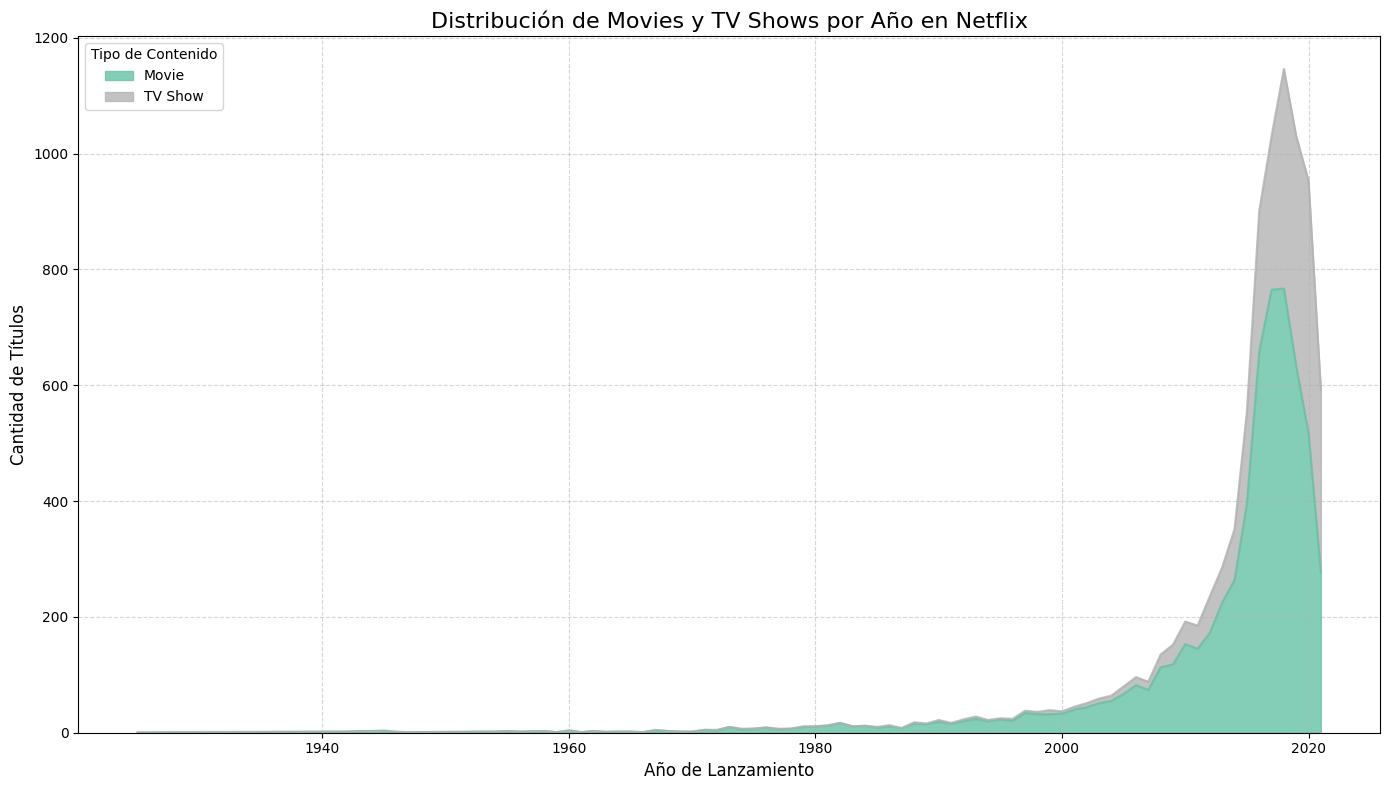

In [34]:
# Agrupar datos por año y tipo
year_type_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivotear la tabla para que cada tipo sea una columna
pivot_df = year_type_counts.pivot(index='release_year', columns='type', values='count').fillna(0)

# Ordenar por año
pivot_df = pivot_df.sort_index()

# Configurar estilo
plt.figure(figsize=(14, 8))
pivot_df.plot(kind='area', stacked=True, colormap='Set2', figsize=(14, 8), alpha=0.8)

# Títulos y etiquetas
plt.title('Distribución de Movies y TV Shows por Año en Netflix', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Cantidad de Títulos', fontsize=12)
plt.legend(title='Tipo de Contenido', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Interpretación**

El eje y (vertical) representa el release_year, desde antes de 1940 hasta 2020.

El eje x (horizontal) muestra el número de títulos lanzados cada año.

Se diferencian dos categorías:

🟩 Movies (color verde)

⬜ TV Shows (color gris)

Las áreas están apiladas (“stacked”), mostrando el total acumulado año por año.

**Decisión técnica**

Se utilizó el gráfico de áreas apiladas para mostrar tendencias temporales acumuladas, y cómo una categoría influye sobre el total. Nos permite ver solapamiento y crecimiento relativo entre tipos de contenido año tras año.

**Conclusiones**

* Desde 2000 en adelante se observa una aceleración exponencial en la cantidad de lanzamientos, sobre todo a partir de 2015, alineada con el crecimiento agresivo de Netflix como productora y distribuidora.

* Las peliculas (Movies) dominan el volumen histórico, pero los TV Shows incrementan significativamente en años recientes, indicando una estrategia editorial más enfocada en series para retención de usuarios.

* Hay un comportamiento cíclico o picos de producción que podrían asociarse con eventos globales o cambios en la industria del entretenimiento.

## **Conclusión**

Durante esta etapa se implementaron múltiples artefactos visuales para representar características clave del catálogo de Netflix. A través de visualizaciones avanzadas como heatmaps, gráficos de burbujas y áreas acumuladas.

La importancia de aplicar visualizaciones:

* Traducen datos en conocimiento narrativo
* Facilitan la toma de decisiones
* Mejoran la comunicación técnica y ejecutiva

# **5. Referencias**

[1] https://www.ibm.com/es-es/think/topics/data-processing

[2] https://www.tableau.com/learn/articles/what-is-data-cleaning#:~:text=limpieza%20de%20datos-,%C2%BFQu%C3%A9%20es%20la%20limpieza%20de%20datos?,realiza%20correctamente%20en%20todo%20momento.

[3] https://www.tableau.com/es-mx/learn/articles/data-visualization#:~:text=La%20visualizaci%C3%B3n%20de%20datos%20es,y%20patrones%20en%20los%20datos.